In [0]:
from google.colab import drive,files

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Imports go here
import pickle
import numpy as np
from keras.utils import plot_model
from keras.models import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.optimizers import Nadam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
# dir path
datadirpath = 'gdrive/My Drive/DL Project/Data/ready_chinese_food'
labeldirpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngreLabel.txt'
IngredientList = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientList.txt'
IngredientTypeSheet = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/IngredientType.xlsx'

trainlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'
vallistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/VAL.txt'
testlistpath = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TE.txt'

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

pickletraindata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y3.pkl'
picklevaldata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y3.pkl'
pickletestdata_Y3 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y3.pkl'

credentialFile = 'gdrive/My Drive/DL Project/Credentials/Food-Ingredient-cred.json'
#pickleModelC_IngFood.pkl
#Models Pickled
pickleModelA1_IngFood = 'gdrive/My Drive/DL Project/PickleFiles/pickleModelA1_IngFood.pkl'

pickletraindata_X_new= 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_balanced'

pickletraindata_Y1_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y1'

pickletraindata_Y2_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y2'

pickletraindata_Y3_new = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainBalanced_Y3'



In [5]:
'''train_X = pickle.load(open(pickletraindata_X_new+"10000.pkl",'rb'))
train_Y1 = pickle.load(open(pickletraindata_Y1_new+"10000.pkl",'rb'))
train_Y2 = pickle.load(open(pickletraindata_Y2_new+"10000.pkl",'rb'))
train_Y3 = pickle.load(open(pickletraindata_Y3_new+"10000.pkl",'rb'))'''

'train_X = pickle.load(open(pickletraindata_X_new+"10000.pkl",\'rb\'))\ntrain_Y1 = pickle.load(open(pickletraindata_Y1_new+"10000.pkl",\'rb\'))\ntrain_Y2 = pickle.load(open(pickletraindata_Y2_new+"10000.pkl",\'rb\'))\ntrain_Y3 = pickle.load(open(pickletraindata_Y3_new+"10000.pkl",\'rb\'))'

In [0]:
#len(train_X),len(train_X[0]),len(train_X[0][0]),len(train_X[0][0][0]),len(train_X[0][0][0][0]),len(train_Y1),len(train_Y2),len(train_Y3)

Loading train_X

In [7]:
train_X = pickle.load(open(pickletraindata_X, 'rb' ))
train_X = np.array(train_X)
print(train_X.shape)

(66071, 1, 7, 7, 512)


In [8]:
train_X=train_X.reshape(train_X.shape[0],7,7,512)
print(train_X.shape)

(66071, 7, 7, 512)


Loading train_Y1

In [9]:
train_Y1 = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1)
print(train_Y1.shape)

(66071, 172)


Loading train_Y2

In [10]:
train_Y2 = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


Loading val_X

In [11]:
val_X = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X)
print(val_X.shape)

(11016, 1, 7, 7, 512)


In [12]:
val_X=val_X.reshape(val_X.shape[0],7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


Loading val_Y1

In [13]:
val_Y1 = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1)
print(val_Y1.shape)

(11016, 172)


Loading val_Y2

In [14]:
val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0
  
print(val_Y2.shape)

(11016, 353)


In [15]:
# Loading test_X

test_X_list = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X_list)

print(test_X.shape)
test_X=test_X.reshape(len(test_X_list),7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

test_Y3 = pickle.load(open(pickletestdata_Y3,"rb"))
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)
(33154, 353)


In [0]:
train_Y3 = pickle.load(open(pickletraindata_Y3,"rb"))
val_Y3 = pickle.load(open(picklevaldata_Y3,"rb"))


In [0]:
def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val



DCNN for Arichitecture A

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 7, 7, 2048)   9439232     input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 7, 7, 1024)   18875392    conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 4, 4, 1024)   0           conv2d_8[0][0]                   
____________________________________________________________________________________________

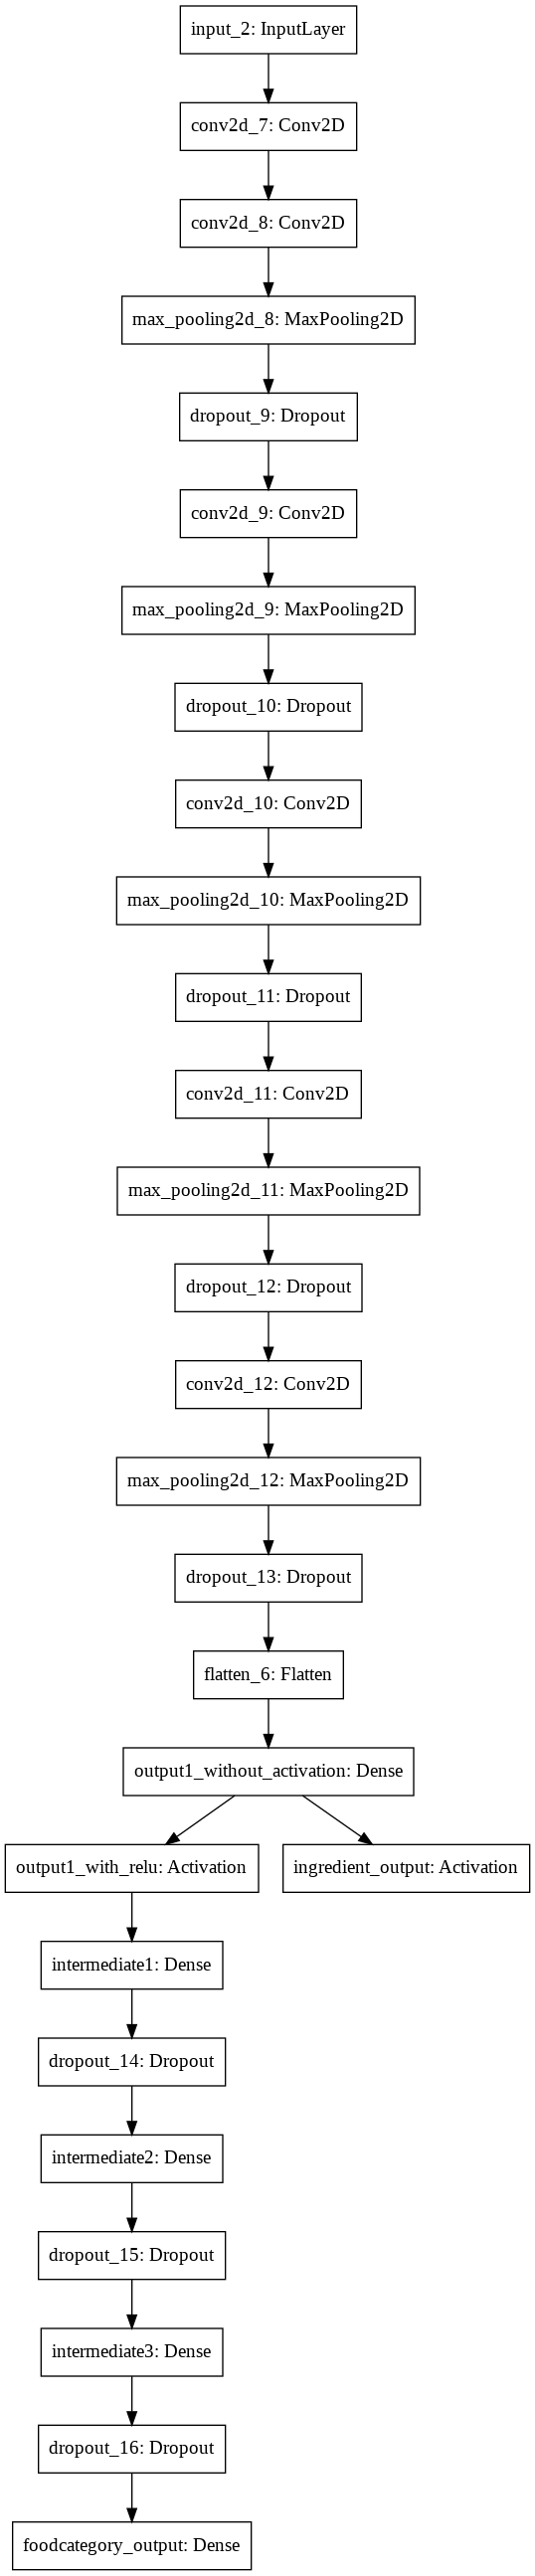

In [22]:
# Model_A1 stacking ingredient recognition on top of food categorization 

inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.3)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.2)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.3)(maxPool2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.2)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened4 = Flatten()(dropout4)
flattened6 = Flatten()(dropout6)

output1_without_activation = Dense(353,activation=None,name='output1_without_activation')(flattened6)  ##  Ingredient recognition
output1 = keras.layers.Activation("sigmoid",name="ingredient_output")(output1_without_activation)
output1_with_relu = keras.layers.Activation("relu",name="output1_with_relu")(output1_without_activation)

intermediate1 = Dense(512,activation='relu',name='intermediate1')(output1_with_relu) 
dropout7 = Dropout(0.3)(intermediate1)

intermediate2 = Dense(256,activation='relu',name='intermediate2')(dropout7)
dropout8 = Dropout(0.2)(intermediate2)

intermediate3 = Dense(256,activation='relu',name='intermediate3')(dropout8)
dropout9 = Dropout(0.3)(intermediate3)

output2 = Dense(172,activation='softmax',name='foodcategory_output')(dropout9) ##  Food categorization

model_A1 = Model(inputs=inputs, outputs=[output1,output2]) # Defining model with Architecture A1
print(model_A1.summary()) # summarize layers
plot_model(model_A1, to_file='Multi-task Architecture A1.png') # plot graph

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_A1.compile(optimizer=Adam(lr=0.0005),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])

In [24]:
model_A1.fit(train_X, [train_Y2,train_Y1], batch_size=256, epochs=50,validation_data = (val_X, [val_Y2, val_Y1]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/50
66071/66071 [==============================] - 48s 727us/step - loss: 5.0917 - ingredient_output_loss: 0.0817 - foodcategory_output_loss: 5.0099 - ingredient_output_get_f1: 0.0763 - ingredient_output_top5_acc: 0.2415 - foodcategory_output_get_f1: 0.0016 - foodcategory_output_top5_acc: 0.0539 - val_loss: 4.8735 - val_ingredient_output_loss: 0.0515 - val_foodcategory_output_loss: 4.8220 - val_ingredient_output_get_f1: 0.0834 - val_ingredient_output_top5_acc: 0.3761 - val_foodcategory_output_get_f1: 0.0053 - val_foodcategory_output_top5_acc: 0.0730
Epoch 2/50
66071/66071 [==============================] - 46s 690us/step - loss: 4.7198 - ingredient_output_loss: 0.0540 - foodcategory_output_loss: 4.6658 - ingredient_output_get_f1: 0.0908 - ingredient_output_top5_acc: 0.3210 - foodcategory_output_get_f1: 0.0049 - foodcategory_output_top5_acc: 0.0893 - val_loss: 4.5385 - val_ingredient_output_loss: 0.0495 - val_foodcategory_output_l

In [25]:
## prediction on test


results = model_A1.evaluate(test_X, [test_Y2,test_Y1], batch_size=128)
#print(results)
print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])

print('Generate predictions for all samples')
predictions = model_A1.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 9s 269us/step
Ingredient F1: 0.4599970648165325
Ingredient Top5: 0.6064124992459432
Food F1: 0.6501934427565513
Food Top5: 0.773240031368764
Generate predictions for all samples


In [26]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.29      0.62      0.40      6698
           1       0.62      0.25      0.36       666
           2       0.25      0.04      0.07       731
           3       0.33      0.76      0.46       144
           4       0.66      0.73      0.69       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.67      0.35      0.46       868
           9       0.11      0.01      0.01       365
          10       0.11      0.15      0.12        41
          11       0.76      0.19      0.30       699
          12       0.45      0.27      0.33       387
          13       0.52      0.25      0.33      1639
          14       0.71      0.07      0.12        76
          15       0.42      0.40      0.41      4353
          16       0.39      0.21      0.27      1138
          17       0.26    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 7, 7, 2048)   9439232     input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, 7, 7, 1024)   18875392    conv2d_25[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_26 (MaxPooling2D) (None, 4, 4, 1024)   0           conv2d_26[0][0]                  
____________________________________________________________________________________________

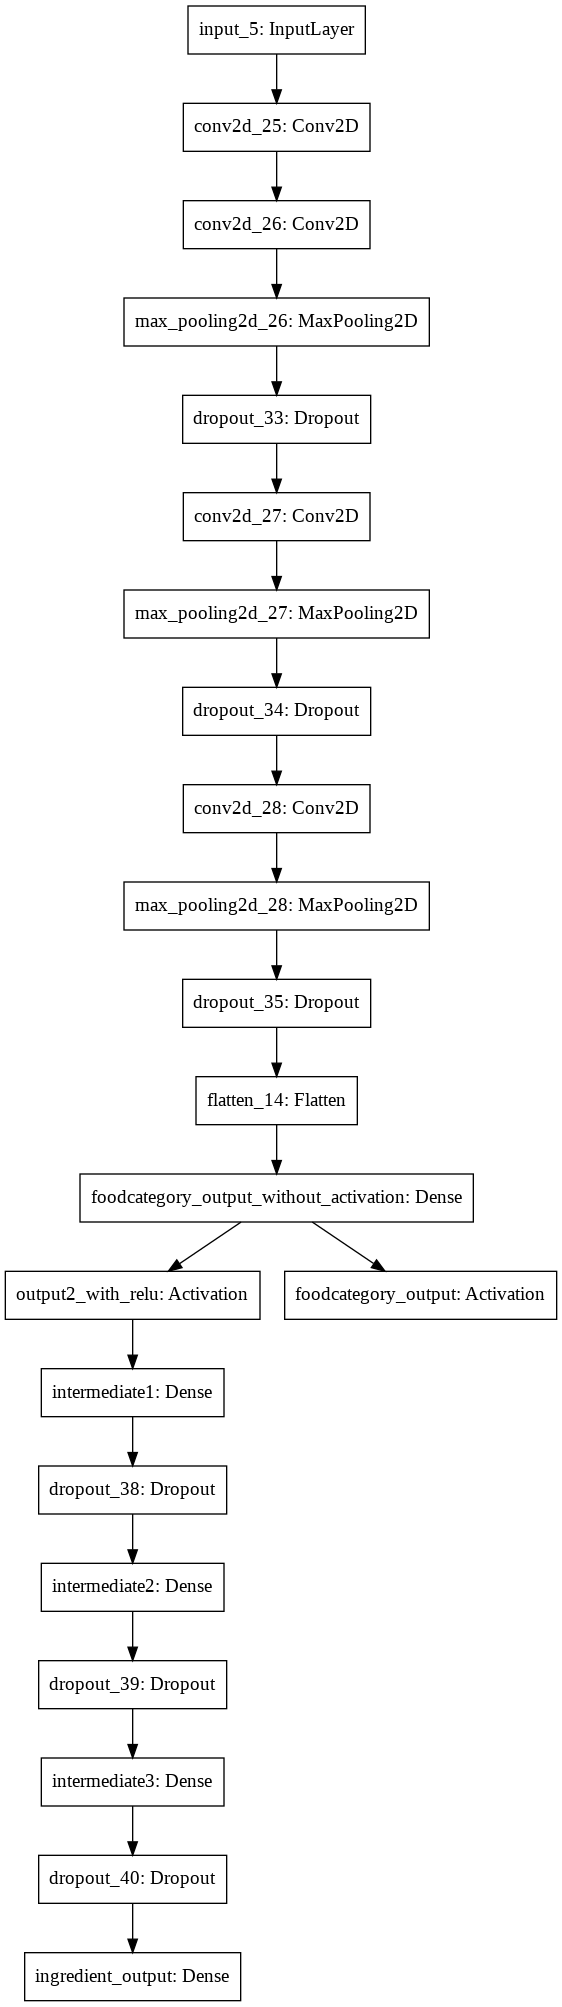

In [33]:
# Model_A2 stacking food categorization on top of ingredient recognition

inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.5)(maxPool2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened4 = Flatten()(dropout4)

flattened6 = Flatten()(dropout6)

output2_without_activation = Dense(172,activation=None,name='foodcategory_output_without_activation')(flattened4) ##  Food categorization
output2 = keras.layers.Activation('softmax',name="foodcategory_output")(output2_without_activation)
output2_with_relu = keras.layers.Activation('relu',name="output2_with_relu")(output2_without_activation)

intermediate1 = Dense(256,activation='relu',name='intermediate1')(output2_with_relu) 
dropout7 = Dropout(0.3)(intermediate1)

intermediate2 = Dense(512,activation='relu',name='intermediate2')(dropout7)
dropout8 = Dropout(0.2)(intermediate2)

intermediate3 = Dense(256,activation='relu',name='intermediate3')(dropout8)
dropout9 = Dropout(0.3)(intermediate3)

output1 = Dense(353,activation='sigmoid',name='ingredient_output')(dropout9)  ##  Ingredient recognition


model_A2 = Model(inputs=inputs, outputs=[output1,output2]) # Defining model with Architecture A1
print(model_A2.summary()) # summarize layers
plot_model(model_A2, to_file='Multi-task Architecture A2.png') # plot graph

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_A2.compile(optimizer=Adam(lr=0.00005),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])

In [35]:
model_A2.fit(train_X, [train_Y2,train_Y1], batch_size=256, epochs=50,validation_data = (val_X, [val_Y2, val_Y1]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/50
66071/66071 [==============================] - 45s 676us/step - loss: 6.4512 - ingredient_output_loss: 0.5704 - foodcategory_output_loss: 5.8808 - ingredient_output_get_f1: 0.0245 - ingredient_output_top5_acc: 0.0845 - foodcategory_output_get_f1: 5.8439e-04 - foodcategory_output_top5_acc: 0.0456 - val_loss: 5.1757 - val_ingredient_output_loss: 0.1855 - val_foodcategory_output_loss: 4.9902 - val_ingredient_output_get_f1: 0.0000e+00 - val_ingredient_output_top5_acc: 0.2077 - val_foodcategory_output_get_f1: 0.0000e+00 - val_foodcategory_output_top5_acc: 0.1137
Epoch 2/50
66071/66071 [==============================] - 42s 640us/step - loss: 4.8595 - ingredient_output_loss: 0.0784 - foodcategory_output_loss: 4.7811 - ingredient_output_get_f1: 0.0304 - ingredient_output_top5_acc: 0.1367 - foodcategory_output_get_f1: 0.0109 - foodcategory_output_top5_acc: 0.1460 - val_loss: 4.3514 - val_ingredient_output_loss: 0.0691 - val_foodcateg

In [36]:
## prediction on test


results = model_A2.evaluate(test_X, [test_Y2,test_Y1], batch_size=128)
#print(results)
print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])

print('Generate predictions for all samples')
predictions = model_A2.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 9s 266us/step
Ingredient F1: 0.5455870543140665
Ingredient Top5: 0.6952403933160403
Food F1: 0.6994807681171815
Food Top5: 0.8762743560354709
Generate predictions for all samples


In [37]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.66      0.37      0.48      6698
           1       0.63      0.37      0.47       666
           2       0.55      0.02      0.03       731
           3       0.70      0.65      0.67       144
           4       0.72      0.66      0.69       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.64      0.63      0.64       868
           9       0.00      0.00      0.00       365
          10       0.00      0.00      0.00        41
          11       0.71      0.25      0.37       699
          12       0.58      0.12      0.19       387
          13       0.67      0.22      0.34      1639
          14       0.56      0.12      0.20        76
          15       0.73      0.26      0.39      4353
          16       0.46      0.12      0.19      1138
          17       0.63    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Architecture B

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 7, 7, 2048)   9439232     input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 7, 7, 1024)   18875392    conv2d_31[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_32 (MaxPooling2D) (None, 4, 4, 1024)   0           conv2d_32[0][0]                  
____________________________________________________________________________________________

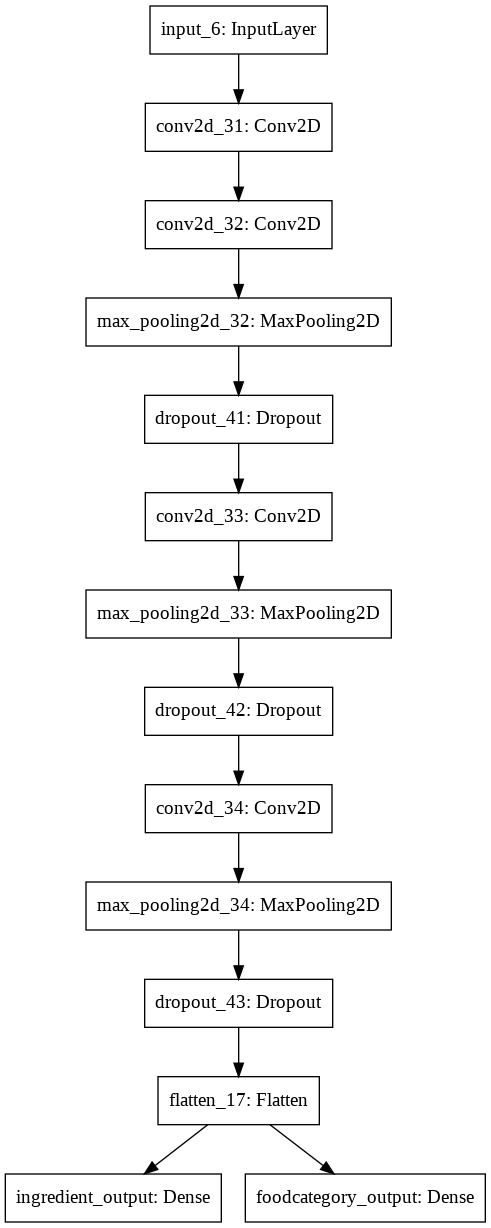

In [38]:

inputs = Input(shape=(7,7,512))
inputs_1 = Flatten()(inputs)
 
conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.5)(maxPool2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened4 = Flatten()(dropout4)

flattened6 = Flatten()(dropout6)

output2 = Dense(172,activation='softmax',name='foodcategory_output')(flattened4) ##  Food categorization
output1 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened4)  ##  Ingredient recognition


model_B = Model(inputs=inputs, outputs=[output1,output2]) # Defining model with Architecture A1
print(model_B.summary()) # summarize layers
plot_model(model_B, to_file='Multi-task Architecture B.png') # plot graph



In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

model_B.compile(optimizer=Adam(lr=0.00005),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[get_f1,top5_acc])

In [40]:
model_B.fit(train_X, [train_Y2,train_Y1], batch_size=256, epochs=50,validation_data = (val_X, [val_Y2, val_Y1]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/50
66071/66071 [==============================] - 44s 669us/step - loss: 6.3290 - ingredient_output_loss: 0.6652 - foodcategory_output_loss: 5.6638 - ingredient_output_get_f1: 0.0146 - ingredient_output_top5_acc: 0.0112 - foodcategory_output_get_f1: 3.3316e-04 - foodcategory_output_top5_acc: 0.0451 - val_loss: 5.5238 - val_ingredient_output_loss: 0.5481 - val_foodcategory_output_loss: 4.9757 - val_ingredient_output_get_f1: 0.0087 - val_ingredient_output_top5_acc: 0.0045 - val_foodcategory_output_get_f1: 0.0000e+00 - val_foodcategory_output_top5_acc: 0.1326
Epoch 2/50
66071/66071 [==============================] - 42s 636us/step - loss: 5.1526 - ingredient_output_loss: 0.3371 - foodcategory_output_loss: 4.8154 - ingredient_output_get_f1: 0.0136 - ingredient_output_top5_acc: 0.0132 - foodcategory_output_get_f1: 0.0094 - foodcategory_output_top5_acc: 0.1455 - val_loss: 4.5106 - val_ingredient_output_loss: 0.3418 - val_foodcategory_

In [41]:
## prediction on test

results = model_B.evaluate(test_X, [test_Y2,test_Y1], batch_size=128)
#print(results)
print('Ingredient F1:', results[3])
print('Ingredient Top5:', results[4])
print('Food F1:', results[5])
print('Food Top5:', results[6])

print('Generate predictions for all samples')
predictions = model_B.predict(test_X)


predictions_ingredients=1*(predictions[0] >= 0.5)
#predictions_ingredients

33154/33154 [==============================] - 9s 260us/step
Ingredient F1: 0.5327776135696881
Ingredient Top5: 0.6945768233094046
Food F1: 0.7010505418729428
Food Top5: 0.8783253906014358
Generate predictions for all samples


In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.68      0.32      0.44      6698
           1       0.69      0.33      0.45       666
           2       0.41      0.02      0.03       731
           3       0.83      0.51      0.63       144
           4       0.74      0.67      0.71       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.65      0.62      0.64       868
           9       0.00      0.00      0.00       365
          10       0.00      0.00      0.00        41
          11       0.67      0.26      0.38       699
          12       0.59      0.09      0.15       387
          13       0.71      0.20      0.32      1639
          14       0.75      0.04      0.07        76
          15       0.79      0.21      0.33      4353
          16       0.51      0.15      0.24      1138
          17       0.70    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [0]:
indices = [(i,item) for i,item in enumerate(predictions[0][0]) if item in sorted(predictions[0][0])[-5:353]]

In [59]:
indices

[(348, 0.13177344),
 (349, 0.145572),
 (350, 0.24096918),
 (351, 0.3661597),
 (352, 0.94063306)]